<a href="https://colab.research.google.com/github/kautilyak/KDD-project/blob/main/Relational_Analysis_of_Country_Wise_Economic_Growth_and_Academic_Qualification_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA** and preprocessing

In [48]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer

Importing the raw datasets

In [49]:
cols_to_keep = ['Country Name', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

#education attainment
lower_secondary_og = pd.read_csv('data/attain_lower_secondary.csv', skiprows=3, header=1, usecols=cols_to_keep)
upper_secondary_og = pd.read_csv('data/attain_upper_secondary.csv', skiprows=2, header=1, usecols=cols_to_keep)
bachelors_og = pd.read_csv('data/attain_bachelors.csv', skiprows=3, header=1, usecols=cols_to_keep)
masters_og = pd.read_csv('data/attain_masters.csv', skiprows=3, header=1, usecols=cols_to_keep)
doctoral_og = pd.read_csv('data/attain_doctoral.csv', skiprows=3, header=1, usecols=cols_to_keep)

#Literacy Rate
#literacy_og = pd.read_csv('data/literacy_rate.csv', skiprows=3, header=1, usecols = cols_to_keep)

#Population 
population_og = pd.read_csv('data/population_total.csv', skiprows=2, header=1, usecols = cols_to_keep)

#Country Data GDP
gdp_millions_og = pd.read_csv('data/country_gdp_millions.csv', skiprows=3, header=1, usecols=cols_to_keep)
#expenditure_total_og = pd.read_csv('data/expenditure_total_gdp.csv', skiprows=3, header=1, usecols=cols_to_keep)

Restructuring the dataset to the required format


In [50]:
#restructure the data to match the required format.

lower_secondary = lower_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="LowerSecondaryAttainment")
upper_secondary = upper_secondary_og.melt(id_vars=['Country Name'], var_name="Year", value_name="UpperSecondaryAttainment")
bachelors = bachelors_og.melt(id_vars=['Country Name'], var_name="Year", value_name="BachelorsAttainment")
masters = masters_og.melt(id_vars=['Country Name'], var_name="Year", value_name="MastersAttainment")
doctoral = doctoral_og.melt(id_vars=['Country Name'], var_name="Year", value_name="DoctoralAttainment")

#literacy = literacy_og.melt(id_vars=['Country Name'], var_name = 'Year', value_name = 'Literacy Rate')

population = population_og.melt(id_vars=['Country Name'], var_name = 'Year', value_name = 'Population')
#expenditure_total = expenditure_total_og.melt(id_vars=['Country Name'], var_name="Year", value_name="%_expenditure_gdp")
gdp_millions = gdp_millions_og.melt(id_vars=['Country Name'], var_name="Year", value_name="GDP")

In [51]:
lower_secondary.head()

,Country Name,Year,LowerSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [52]:
upper_secondary.head()

,Country Name,Year,UpperSecondaryAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [53]:
bachelors.head()

,Country Name,Year,BachelorsAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [54]:
masters.head()

,Country Name,Year,MastersAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [55]:
doctoral.head()

,Country Name,Year,DoctoralAttainment
0,Aruba,2001,NaN
1,Africa Eastern and Southern,2001,NaN
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,NaN
4,Angola,2001,NaN


In [56]:
#GDP in millions of USD
gdp_millions.head()

,Country Name,Year,GDP
0,Aruba,2001,1.920112e+09
1,Africa Eastern and Southern,2001,2.414727e+11
2,Afghanistan,2001,NaN
3,Africa Western and Central,2001,1.418625e+11
4,Angola,2001,8.936064e+09


**Merging data into one DataFrame based on Country and year.**

In [57]:


df= lower_secondary.merge(upper_secondary, on=['Country Name', 'Year'], how='inner')
df = df.merge(bachelors, on= ['Country Name', 'Year'], how='inner')
df = df.merge(masters, on= ['Country Name', 'Year'], how='inner')
df = df.merge(doctoral, on= ['Country Name', 'Year'], how='inner')

#df = df.merge(literacy,on= ['Country Name', 'Year'], how='inner')

df = df.merge(population, on= ['Country Name', 'Year'], how='inner')

df= df.merge(gdp_millions, on= ['Country Name', 'Year'], how='inner')
#df= df.merge(expenditure_total, on= ['Country Name', 'Year'], how='inner')

In [58]:
df.sort_values(by='DoctoralAttainment', ascending=False).head(10)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
3495,Switzerland,2014,97.020653,84.643852,35.605011,18.198759,2.97441,8188649.0,7.343966e+11
4559,Switzerland,2018,97.085258,85.681770,NaN,19.968210,2.93416,8514329.0,7.358892e+11
4027,Switzerland,2016,96.890182,84.536911,NaN,18.941710,2.90631,8373338.0,6.956007e+11
3761,Switzerland,2015,97.093933,85.190010,36.949291,19.010530,2.90017,8282396.0,7.021496e+11
4478,Slovenia,2017,97.772781,82.560631,20.681210,15.322310,2.75572,2066388.0,4.846659e+10
3998,United Arab Emirates,2016,70.710388,53.070511,31.690479,15.693130,2.53629,9360975.0,3.570451e+11
4212,Slovenia,2016,97.620468,81.868843,19.643311,14.654430,2.30224,2065042.0,4.473633e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.050380,2.03265,326838199.0,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.614010,1.85372,323071755.0,1.874508e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.765360,1.76948,318386329.0,1.752716e+13


**Finding out the statistics for the data at hand.**


In [59]:
df.describe()

,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
count,859.000000,892.000000,395.000000,313.000000,266.000000,5.027000e+03,4.815000e+03
mean,67.347947,54.028222,16.953988,6.017786,0.549386,2.801156e+08,2.021519e+12
std,24.973076,24.312810,9.409896,5.871226,0.553637,8.821797e+08,7.300274e+12
min,2.036170,0.495100,0.000000,0.000000,0.000000,9.478000e+03,1.319654e+07
25%,49.352505,33.742116,9.868765,1.406010,0.165848,1.362444e+06,6.030060e+09
50%,69.974228,56.564384,16.016060,2.944240,0.426045,9.483499e+06,3.847452e+10
75%,90.304523,75.622433,23.706759,10.866280,0.754873,5.910752e+07,4.425368e+11
max,100.000000,97.399788,59.260880,28.150810,2.974410,7.673345e+09,8.760777e+13


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   object 
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   Population                5027 non-null   float64
 8   GDP                       4815 non-null   float64
dtypes: float64(7), object(2)
memory usage: 394.8+ KB


In [61]:
df['Year'] = df['Year'].astype('int64')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5054 entries, 0 to 5053
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              5054 non-null   object 
 1   Year                      5054 non-null   int64  
 2   LowerSecondaryAttainment  859 non-null    float64
 3   UpperSecondaryAttainment  892 non-null    float64
 4   BachelorsAttainment       395 non-null    float64
 5   MastersAttainment         313 non-null    float64
 6   DoctoralAttainment        266 non-null    float64
 7   Population                5027 non-null   float64
 8   GDP                       4815 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 394.8+ KB


In [63]:
df.sort_values(by='GDP', ascending=False).head(20)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
5047,World,2019,NaN,NaN,NaN,NaN,NaN,7.673345e+09,8.760777e+13
4781,World,2018,NaN,NaN,NaN,NaN,NaN,7.592476e+09,8.634351e+13
4515,World,2017,NaN,NaN,NaN,NaN,NaN,7.509410e+09,8.132672e+13
3717,World,2014,NaN,NaN,NaN,NaN,NaN,7.254293e+09,7.946886e+13
3451,World,2013,NaN,NaN,NaN,NaN,NaN,7.169675e+09,7.733191e+13
4249,World,2016,NaN,NaN,NaN,NaN,NaN,7.424485e+09,7.641725e+13
3983,World,2015,NaN,NaN,NaN,NaN,NaN,7.339077e+09,7.523360e+13
3185,World,2012,NaN,NaN,NaN,NaN,NaN,7.085790e+09,7.517281e+13
2919,World,2011,NaN,NaN,NaN,NaN,NaN,7.002881e+09,7.347986e+13
2653,World,2010,NaN,NaN,NaN,NaN,NaN,6.921877e+09,6.616266e+13


In [64]:
df.columns

Index(['Country Name', 'Year', 'LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment', 'Population', 'GDP'],
      dtype='object')

###**Perfom listwise deletion for all rows**
#### If all the columns in the subset have null values in them, they are dropped.

In [65]:

df1 = df.dropna(axis=0, how='all', subset=['LowerSecondaryAttainment',
       'UpperSecondaryAttainment', 'BachelorsAttainment', 'MastersAttainment',
       'DoctoralAttainment'])

df1.sort_values(by="GDP", ascending=False).head(50)

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,3.268382e+08,2.061186e+13
4241,United States,2016,95.585243,89.092361,33.439690,12.61401,1.85372,3.230718e+08,1.874508e+13
3975,United States,2015,95.334969,88.411972,32.500759,11.99485,1.70131,3.207390e+08,1.823830e+13
3709,United States,2014,95.263474,88.313583,31.955799,11.76536,1.76948,3.183863e+08,1.752716e+13
3443,United States,2013,95.204529,88.150307,31.660660,11.56644,1.67716,3.160599e+08,1.678485e+13
3177,United States,2012,94.984489,87.679100,NaN,NaN,NaN,3.138777e+08,1.619701e+13
2911,United States,2011,94.902733,87.590889,NaN,NaN,NaN,3.115835e+08,1.554258e+13
2645,United States,2010,94.769501,87.149406,NaN,NaN,NaN,3.093271e+08,1.499205e+13
2113,United States,2008,94.485550,86.614128,NaN,NaN,NaN,3.040940e+08,1.471284e+13
2379,United States,2009,94.535217,86.709084,NaN,NaN,NaN,3.067715e+08,1.444893e+13


In [66]:
df1.shape

(933, 9)

In [67]:
df1[df1['Country Name']=="Canada"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
35,Canada,2001,NaN,67.745132,NaN,NaN,NaN,31020902.0,7.389818e+11
1365,Canada,2006,NaN,79.403389,NaN,NaN,NaN,32571174.0,1.319265e+12
2695,Canada,2011,NaN,82.748993,NaN,NaN,NaN,34339328.0,1.793327e+12
4025,Canada,2016,NaN,84.469193,25.75444,7.09874,0.9462,36109487.0,1.527995e+12


> Number of null values in the `DoctoralAttainment` column

In [96]:
df1[df1['DoctoralAttainment'].isnull()].sum
#% of rows containing null values
df1[df1['DoctoralAttainment'].isnull()].shape[0]*100/df1.shape[0]

71.48981779206859

> Number of null values in the `MastersAttainment` column

In [97]:

df1[df1['MastersAttainment'].isnull()].sum
#% of rows containing null values
df1[df1['MastersAttainment'].isnull()].shape[0]*100/df1.shape[0]

66.45230439442658

> Number of null values in the `BachelorsAttainment` column

In [98]:

df1[df1['BachelorsAttainment'].isnull()].sum
#% of  rows containing null values
df1[df1['BachelorsAttainment'].isnull()].shape[0]*100/df1.shape[0]

57.663451232583064

> Number of null values in the `UpperSecondaryAttainment` column

In [99]:

df1[df1['UpperSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['UpperSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

4.394426580921758

> Number of null values in the `LowerSecondaryAttainment` column

In [100]:

df1[df1['LowerSecondaryAttainment'].isnull()].shape
#% of rows containing null values
df1[df1['LowerSecondaryAttainment'].isnull()].shape[0]*100/df1.shape[0]

7.931404072883173

> Counting the number of countries in the dataFrame. We can see that the total number of countries is `160`

In [73]:
print(df1['Country Name'].nunique())
np.sort(df1['Country Name'].unique())

160


array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guinea', 'Guyana', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'I

we can see that we have *160* countries of which we will only consider about *48* due to absense of data.

Steps to fill in the null values:
1. find data from other data sources
2. predict values for a few missing years for that particular country

In [74]:
df1[df1['Country Name']=="India"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
2769,India,2011,37.56583,26.88855,9.13629,NaN,NaN,1.250288e+09,1.823050e+12


In [75]:
df1[df1['Country Name']=="Pakistan"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
1248,Pakistan,2005,21.421249,6.758670,3.91674,NaN,NaN,160304007.0,1.200553e+11
1514,Pakistan,2006,32.457909,23.346050,6.29512,NaN,NaN,164022626.0,1.372641e+11
2046,Pakistan,2008,31.218460,22.583241,5.97695,NaN,NaN,171648984.0,1.700778e+11
2312,Pakistan,2009,32.203251,23.299620,6.67146,NaN,NaN,175525610.0,1.681528e+11
2578,Pakistan,2010,33.385101,23.878719,6.97446,NaN,NaN,179424643.0,1.771656e+11
2844,Pakistan,2011,33.247822,24.154091,7.36819,NaN,NaN,183340168.0,2.135874e+11
3110,Pakistan,2012,34.975361,25.649509,NaN,1.63380,0.46233,187280125.0,2.243836e+11
3376,Pakistan,2013,35.427330,26.070610,NaN,1.73293,0.49014,191260799.0,2.312186e+11
3642,Pakistan,2014,37.331280,27.717890,NaN,1.88082,0.51610,195305012.0,2.443609e+11
4174,Pakistan,2016,37.237751,27.610020,NaN,1.73439,0.50120,203631356.0,2.786546e+11


In [76]:
df1[df1['Country Name']=="Albania"]

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3060173.0,3.922099e+09
1867,Albania,2008,81.733788,39.889111,NaN,NaN,NaN,2947314.0,1.288135e+10
2665,Albania,2011,85.226219,43.490341,1.45834,NaN,NaN,2905195.0,1.289077e+10
2931,Albania,2012,87.214897,45.279148,12.89966,12.33073,0.08962,2900401.0,1.231983e+10


### Grouping by countries and checking for the non-null values in each row.

In [77]:

count_table = df1.groupby(by="Country Name", axis=0).count()
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Albania,4,4,4,2,1,1,4,4
Algeria,2,2,2,0,0,0,2,2
Andorra,7,7,3,0,3,0,7,7
Angola,1,1,1,1,0,0,1,1
Argentina,13,13,2,0,0,0,13,13
...,...,...,...,...,...,...,...,...
Uzbekistan,5,5,5,5,0,0,5,5
"Venezuela, RB",7,7,6,3,2,0,7,5
Vietnam,1,1,1,0,0,0,1,1


###Filter out countries with less than 4 years of Data

In [78]:

logic = count_table['Year'] >= 4
count_table = count_table[logic]
count_table

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Albania,4,4,4,2,1,1,4,4
Andorra,7,7,3,0,3,0,7,7
Argentina,13,13,2,0,0,0,13,13
Armenia,4,4,4,4,0,3,4,4
Australia,15,15,15,6,6,6,15,15
...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13
Uzbekistan,5,5,5,5,0,0,5,5
"Venezuela, RB",7,7,6,3,2,0,7,5


In [79]:
# List of countries to be considered.
countries = list(count_table.index)
print(countries)

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia

### Create a new DataFrame with only the countries to be included.

In [80]:
df_new = df1[df1['Country Name'].isin(countries)]
df_new

,Country Name,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
5,Albania,2001,75.734047,37.044891,NaN,NaN,NaN,3060173.0,3.922099e+09
9,Argentina,2001,45.891689,34.293350,NaN,NaN,NaN,37275644.0,2.686968e+11
10,Armenia,2001,91.079193,81.583076,20.356550,NaN,NaN,3050686.0,2.118468e+09
20,Bangladesh,2001,26.714729,17.128429,NaN,NaN,NaN,130088709.0,5.399129e+10
21,Bulgaria,2001,87.861794,59.462120,18.045570,NaN,NaN,8009142.0,1.418350e+10
...,...,...,...,...,...,...,...,...,...
4755,Thailand,2018,46.237068,33.305931,14.939000,2.05563,0.10102,69428454.0,5.066111e+11
4772,Uruguay,2018,56.832142,30.441191,11.473180,2.08136,NaN,3449290.0,6.451504e+10
4773,United States,2018,96.029373,89.805359,34.992470,13.05038,2.03265,326838199.0,2.061186e+13
4774,Uzbekistan,2018,99.904869,96.149246,16.303419,NaN,NaN,32956100.0,5.039261e+10


In [81]:
logic = count_table['DoctoralAttainment'] >= 4
count_table_doctoral = count_table[logic]
count_table_doctoral

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Australia,15,15,15,6,6,6,15,15
Austria,12,1,12,4,4,4,12,12
Bahrain,5,5,5,4,4,4,5,5
Bangladesh,10,10,10,9,9,9,10,10
Belgium,11,11,11,5,5,5,11,11
Cyprus,14,14,14,5,4,5,14,14
Czech Republic,12,12,12,4,4,4,12,12
Denmark,13,9,13,4,4,4,13,13
Finland,13,0,13,5,5,5,13,13


In [82]:
# list of countries with more than 4 years of data in Doctoral Attainment for Linear Regression.
countries_doctoral_lr = list(count_table_doctoral.index)
print(countries_doctoral_lr)
print(len(countries_doctoral_lr))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Iran, Islamic Rep.', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'West Bank and Gaza']
33


In [83]:
logic = count_table['MastersAttainment'] >= 4
count_table_masters = count_table[logic]
count_table_masters

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Australia,15,15,15,6,6,6,15,15
Austria,12,1,12,4,4,4,12,12
Bahrain,5,5,5,4,4,4,5,5
Bangladesh,10,10,10,9,9,9,10,10
Belgium,11,11,11,5,5,5,11,11
Chile,8,8,8,4,4,0,8,8
Colombia,14,14,14,11,11,0,14,14
Costa Rica,10,10,10,4,4,1,10,10
Cyprus,14,14,14,5,4,5,14,14


> # List of countries to keep:

In [84]:
# List of countries to keep.
countries_masters = list(count_table_masters.index)
print(countries_masters)
print(len(countries_masters))

['Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden', 'Switzerland', 'Turkey', 'United States', 'Uruguay', 'West Bank and Gaza']
40


In [85]:
logic = count_table['BachelorsAttainment'] >= 4
count_table_bachelors = count_table[logic]
count_table_bachelors

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Armenia,4,4,4,4,0,3,4,4
Australia,15,15,15,6,6,6,15,15
Austria,12,1,12,4,4,4,12,12
Azerbaijan,11,11,11,7,0,3,11,11
Bahrain,5,5,5,4,4,4,5,5
Bangladesh,10,10,10,9,9,9,10,10
Belgium,11,11,11,5,5,5,11,11
Bosnia and Herzegovina,6,4,6,4,3,3,6,6
Bulgaria,13,13,13,13,0,0,13,13


In [86]:
# List of countries to keep.
countries_bachelors = list(count_table_bachelors.index)
print(countries_bachelors)
print(len(countries_bachelors))

['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greenland', 'Honduras', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Pakistan', 'Paraguay', 'Portugal', 'Qatar', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'Sweden', 'United States', 'Uruguay', 'Uzbekistan', 'West Bank and Gaza']
46


In [87]:
logic = count_table['UpperSecondaryAttainment'] >= 4
count_table_uppersec = count_table[logic]
count_table_uppersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Albania,4,4,4,2,1,1,4,4
Armenia,4,4,4,4,0,3,4,4
Australia,15,15,15,6,6,6,15,15
Austria,12,1,12,4,4,4,12,12
Azerbaijan,11,11,11,7,0,3,11,11
...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13
Uzbekistan,5,5,5,5,0,0,5,5
"Venezuela, RB",7,7,6,3,2,0,7,5


In [88]:
# List of countries to keep.
countries_uppersec = list(count_table_uppersec.index)
print(countries_uppersec)
print(len(countries_uppersec))

['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'Unit

In [89]:
logic = count_table['LowerSecondaryAttainment'] >= 4
count_table_lowersec = count_table[logic]
count_table_lowersec

,Year,LowerSecondaryAttainment,UpperSecondaryAttainment,BachelorsAttainment,MastersAttainment,DoctoralAttainment,Population,GDP
Country Name,,,,,,,,
Albania,4,4,4,2,1,1,4,4
Andorra,7,7,3,0,3,0,7,7
Argentina,13,13,2,0,0,0,13,13
Armenia,4,4,4,4,0,3,4,4
Australia,15,15,15,6,6,6,15,15
...,...,...,...,...,...,...,...,...
Uruguay,13,13,13,6,6,1,13,13
Uzbekistan,5,5,5,5,0,0,5,5
"Venezuela, RB",7,7,6,3,2,0,7,5


In [90]:
# List of countries to keep.
countries_lowersec = list(count_table_lowersec.index)
print(countries_lowersec)
print(len(countries_lowersec))

['Albania', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Guatemala', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Indonesia', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy', 'Korea, Rep.', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Mali', 'Malta', 'Mexico', 'Moldova', 'Netherlands', 'Norway', 'Oman', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Senegal', 'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'United Arab Emirates', 'United Kingdom', 'United 

### In the below code, we intend to visualize the growth of GDP and Bachelor's attainment over a period of time for the United States. The visualization signifies that there is an increase in the percentage of bachelor's attainment and the growth in GDP. 

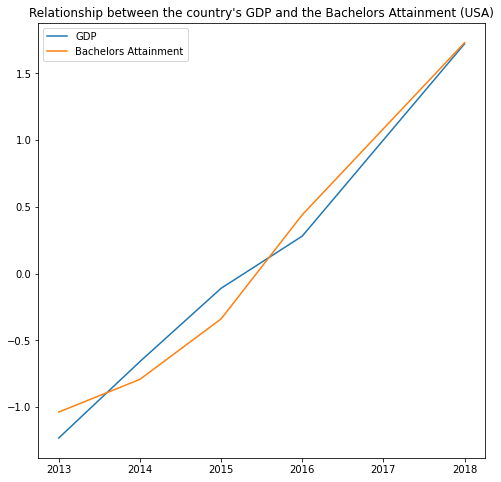

In [91]:
plt.figure(figsize=(8, 8))
usa = df1[(df1['Country Name'] == "United States") & (df1['Year'] > 2012)]
standardizer = StandardScaler()
normalizer = Normalizer()
gdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
bach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
 
plt.plot(usa["Year"], gdp_standardized, label="GDP")
plt.plot(usa["Year"], bach_standardized, label="Bachelors Attainment")
plt.title("Relationship between the country's GDP and the Bachelors Attainment (USA)")
plt.legend()
plt.show()


### The below code is a pair plot of all the features in our dataset.
The KDE plot shows us the trend along with the distribution of the data against each feature and the Scatter plot shows us the mere trend based on each feature.



*   We can clearly see that there is a positive correlation between all features as time progresses.
*   If we notice closely, we can identify that the `Educational attainments` against the `Year` in the scatter plot shows that the rate of increase in educational attainment has increased post 2015 after a period of slow increase. This is very prominent in the case of `DoctoralAttainment` - where there has been a drop during the `2014-2015` period. This could be interlinked to the effects on education due to the Great Recession.



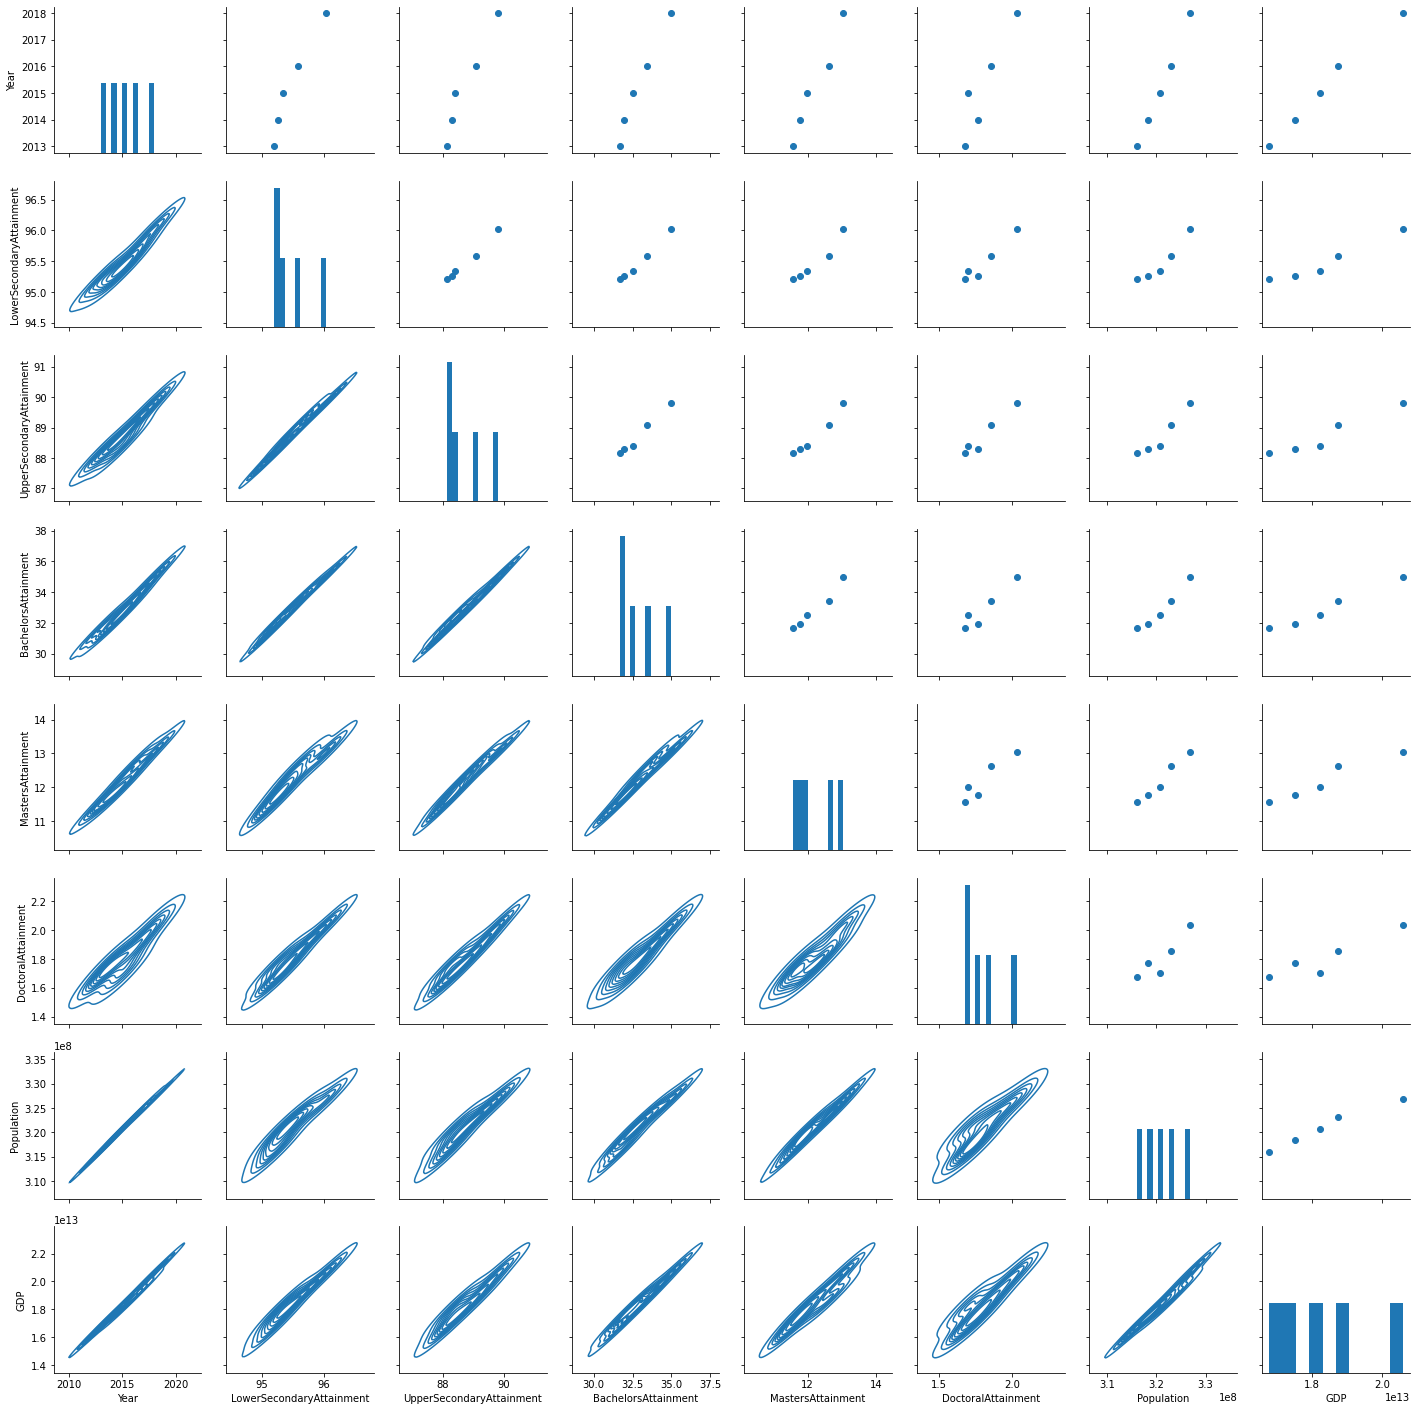

In [92]:
g = sns.PairGrid(usa)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# **Comparision of GDP's correlation with educational attainments**

Here, we have a visualization that compares the GDP and the Bachelor's Attainment of two countries.


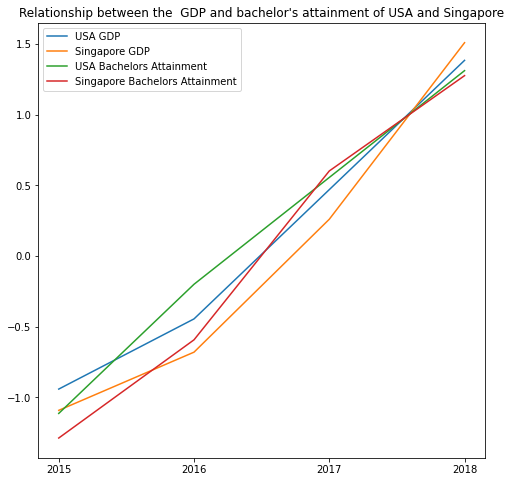

In [93]:
plt.figure(figsize=(8, 8))
usa = df1[(df1['Country Name'] == "United States") & (df1['Year'] > 2014)]
sing = df1[(df1['Country Name']== "Singapore") & (df1['Year'] > 2014)]
standardizer = StandardScaler()
normalizer = Normalizer()
usgdp_standardized = standardizer.fit_transform(usa['GDP'].to_numpy().reshape(-1, 1))
singgdp_standardized = standardizer.fit_transform(sing['GDP'].to_numpy().reshape(-1,1))
usbach_standardized = standardizer.fit_transform(usa['BachelorsAttainment'].to_numpy().reshape(-1, 1))
singbach_standardized = standardizer.fit_transform(sing['BachelorsAttainment'].to_numpy().reshape(-1, 1))
plt.plot(usa["Year"], usgdp_standardized, label="USA GDP")
plt.plot(sing["Year"], singgdp_standardized, label="Singapore GDP")
plt.plot(usa["Year"], usbach_standardized, label="USA Bachelors Attainment")
plt.plot(sing["Year"], singbach_standardized, label="Singapore Bachelors Attainment")
plt.title("Relationship between the  GDP and bachelor's attainment of USA and Singapore")
plt.xticks(sing['Year'])
plt.legend()
plt.show()

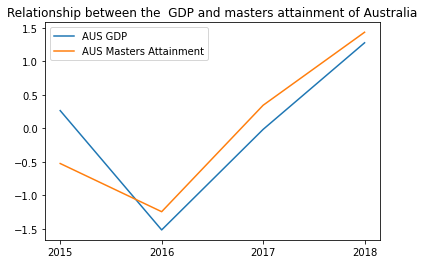

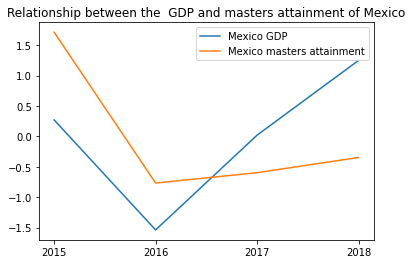

In [94]:
aus = df1[(df1['Country Name']== "Australia") & (df1['Year'] > 2014)]
mexico = df1[(df1['Country Name']== "Mexico") & (df1['Year'] > 2014)]


ausgdp_standardized = standardizer.fit_transform(aus['GDP'].to_numpy().reshape(-1,1))
aus_mast_standardized = standardizer.fit_transform(aus['MastersAttainment'].to_numpy().reshape(-1, 1))
mexgdp_standardized = standardizer.fit_transform(mexico['GDP'].to_numpy().reshape(-1,1))
mex_mast_standardized = standardizer.fit_transform(mexico['MastersAttainment'].to_numpy().reshape(-1, 1))
plt.plot(aus["Year"], ausgdp_standardized, label="AUS GDP")
plt.plot(aus["Year"], aus_mast_standardized, label="AUS Masters Attainment")

plt.title("Relationship between the  GDP and masters attainment of Australia")
plt.xticks(aus['Year'])
plt.legend()
plt.show()
print()
plt.plot(mexico['Year'], mexgdp_standardized, label="Mexico GDP")
plt.plot(mexico['Year'], mex_mast_standardized, label="Mexico masters attainment")
plt.title("Relationship between the  GDP and masters attainment of Mexico")
plt.xticks(aus['Year'])
plt.legend()
plt.show()





>   In the above visualization, we notice that Australia's GDP has dropped from 2015 to 2016 along with the masters attainment and even so for the case of Mexico, but the rate of growth in attainment wasn't as swift as compared to australia. This could be due to other factors unconsidered factors.








In [95]:
# Compare the top 10 doctoral attainment with the top 10 gdp countries to see if there is a match
gdp_2018 = df1[df1['Year'] == 2018]
country_list_gdp = list(gdp_2018.sort_values(by="GDP", ascending=False)['Country Name'][:10])
country_list_doc = list(gdp_2018.sort_values(by="DoctoralAttainment", ascending=False)['Country Name'][:10])
country_dict_gdp = dict()
country_dict_bach = dict()
for i in range(len(country_list_gdp)):
  country_dict_gdp[i] = country_list_gdp[i]

print("Countries with highest GDP (Descending) -", country_dict_gdp)
for i in range(len(country_list_bach)):
  country_dict_bach[i] = country_list_doc[i]
print("Countries with highest Doctoral diplomas (Descending) -", country_dict_bach)

print("Intersection -", set(country_list_gdp).intersection(set(country_list_doc)))

Countries with highest GDP (Descending) - {0: 'United States', 1: 'Germany', 2: 'Brazil', 3: 'Australia', 4: 'Spain', 5: 'Mexico', 6: 'Indonesia', 7: 'Netherlands', 8: 'Switzerland', 9: 'Argentina'}


NameError: ignored



>* 6 out of the top 10 countries with highest Doctoral attainents are from the top 10 GDP countries. This tells us that the higher the diploma the probability that the country has a high attainment rate is proportional to the country's economic standing.*



In [ ]:
# Scatter plot to shwo the distributions of attainment vs year for top 7 gdp countries.
country_list_gdp_7 = list(gdp_2018.sort_values(by="GDP", ascending=False)['Country Name'][:7])
top_7_gdp = df1['Country Name'].isin(country_list_gdp_7)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="Year", y="DoctoralAttainment", data = df1[top_7_gdp], hue='Country Name', size="GDP", sizes=(50, 1100)).set_title("Distributions of Doctoral attainment vs year for top 7 gdp countries.")

This scatter plot shows the distributions of Doctoral attainment vs year for top 7 gdp countries. The output is as expected and USA with the highest GDP (denoted by a bigger marker - higher GDP) has the highest doctoral attainment. 